In [72]:
# import cv2
# import pandas as pd

import glob
import os
import base64
import pandas as pd
import plotly.express as px

import streamlit as st
from streamlit_gsheets import GSheetsConnection

# Read data

In [6]:
import toml
import gspread
from google.oauth2.service_account import Credentials

# Load secrets manually
secrets = toml.load("../.streamlit/secrets.toml")

In [23]:
scopes = [
    "https://www.googleapis.com/auth/spreadsheets",
    "https://www.googleapis.com/auth/drive"
]

In [24]:
# Authenticate
credentials = secrets["connections"]["gsheets"]["credentials"]
creds = Credentials.from_service_account_info(credentials, scopes=scopes)
client = gspread.authorize(creds)

In [74]:
creds.scopes

['https://www.googleapis.com/auth/spreadsheets',
 'https://www.googleapis.com/auth/drive']

In [75]:
# Open sheet by ID
spreadsheet_id = secrets["connections"]["gsheets"]["spreadsheet"]
spreadsheet_id = "1fWyLGY7_sHBceoQ5HGCcpur2w8Ww21gso1LStBb5VZg"
sheet = client.open_by_key(spreadsheet_id)

In [76]:
# Configuration constants
WORKSHEET_NAME = "100happydays"
SPREADSHEET_NAME = "https://docs.google.com/spreadsheets/d/1fWyLGY7_sHBceoQ5HGCcpur2w8Ww21gso1LStBb5VZg/edit?usp=sharing"
N_COLS = 6
N_ROWS = 100
IMAGES_PATH = "../pics/100happydays/*.png"
IMAGE_100_PATH = "../pics/100happydays/project_100happydays_apply_colors_pic100_col.png"
CACHE_TTL = "10m"

In [77]:
# Select a worksheet (tab)
worksheet = sheet.worksheet(WORKSHEET_NAME)
df = worksheet.get_all_records()

df = pd.DataFrame(data)
df.head()

,n_day,day,weekday,event_description,place,tag,outside/inside
0,1,23 Sep 2024,Monday,The gift my parents and I chose for my brother...,Desenzano,"Family, home",inside
1,2,24 Sep 2024,Tuesday,"One of my favorite meals: avocado, cherry toma...",Milano,"Self-care, various",inside
2,3,25 Sep 2024,Wednesday,"Double breakfast with a cake from Abruzzo, kin...",Milano,"Friends, love, community",inside
3,4,26 Sep 2024,Thursday,Got a new piercing with a friend in Bologna.,Bologna,"Friends, love, community",outside
4,5,27 Sep 2024,Friday,"A quiet evening at home, while watching Wall-E...",Milano,"Self-care, various",inside


In [78]:
df.shape

(100, 7)

# Chart of places

In [103]:
df_places = df[['place', 'tag']].value_counts().reset_index()#.sort_values(by='count')
df_places

,place,tag,count
0,Milano,family,37
1,Desenzano,family,13
2,Milano,other,11
3,Milano,friends,9
4,Milano,food,6
5,Milano,"Self-care, various",4
6,Milano,dataviz,4
7,Milano,flowers,3
8,Bologna,family,3
9,Bologna,"Friends, love, community",1


In [107]:
color_dict = {
    'Family, home': 'red',
    'Friends, love, community': 'yellow',
    'Outdoors, flowers, nature': 'green',
    'Dataviz, work, learning': 'blue',
    'Self-care, various': 'pink'
}

In [120]:
# Sorting
totals = df_places.groupby('place')['count'].sum().sort_values(ascending=False)
sorted_places = totals.index.tolist() 
sorted_places

['Milano', 'Desenzano', 'Bologna', 'Calalzo di Cadore', 'Padova']

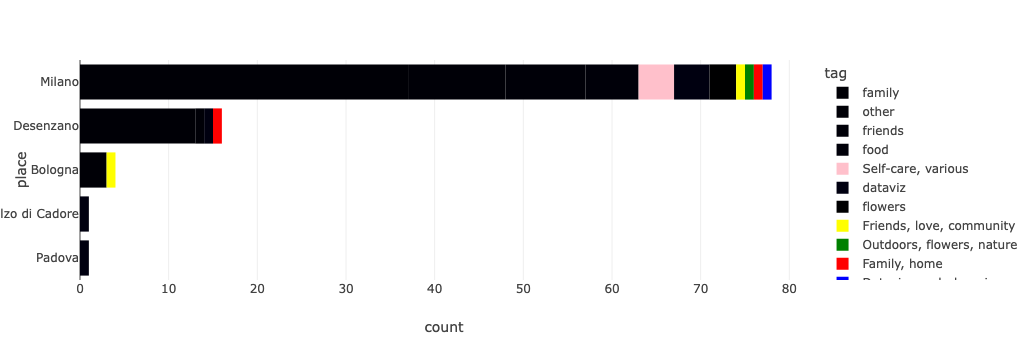

In [121]:
# Create vertical bar chart
fig = px.bar(df_places, y='place', x='count', color='tag', color_discrete_map=color_dict, category_orders={'place': sorted_places})

# Show chart
fig.show()

# Read images

In [83]:
IMAGES_PATH = '../pics/100happydays/*.png'

In [84]:
output_images = glob.glob(IMAGES_PATH)
images = [os.path.join(IMAGES_PATH, f) for f in os.listdir(IMAGES_PATH)]
view_images = sorted(output_images)
#view_images[:12]

FileNotFoundError: [Errno 2] No such file or directory: '../pics/100happydays/*.png'

In [85]:
os.listdir(IMAGES_PATH)

FileNotFoundError: [Errno 2] No such file or directory: '../pics/100happydays/*.png'

In [70]:
def sort_images_by_number(image_paths):
    """
    Sort image paths by extracting the numeric value from filenames.
    
    Args:
        image_paths (list): List of image file paths
        
    Returns:
        list: Sorted list of image paths by numeric order
    """
    def extract_number(path):
        # Extract number from filename like 'pic01_col.png' or 'pic100_col.png'
        match = re.search(r'pic(\d+)_col\.png', path)
        if match:
            return int(match.group(1))  # Convert to int for proper sorting
        return 0  # fallback for files that don't match pattern
    
    return sorted(image_paths, key=extract_number)

In [71]:
sort_images_by_number(output_images)

['../pics/100happydays/project_100happydays_apply_colors_pic01_col.png',
 '../pics/100happydays/project_100happydays_apply_colors_pic02_col.png',
 '../pics/100happydays/project_100happydays_apply_colors_pic03_col.png',
 '../pics/100happydays/project_100happydays_apply_colors_pic04_col.png',
 '../pics/100happydays/project_100happydays_apply_colors_pic05_col.png',
 '../pics/100happydays/project_100happydays_apply_colors_pic06_col.png',
 '../pics/100happydays/project_100happydays_apply_colors_pic07_col.png',
 '../pics/100happydays/project_100happydays_apply_colors_pic08_col.png',
 '../pics/100happydays/project_100happydays_apply_colors_pic09_col.png',
 '../pics/100happydays/project_100happydays_apply_colors_pic10_col.png',
 '../pics/100happydays/project_100happydays_apply_colors_pic11_col.png',
 '../pics/100happydays/project_100happydays_apply_colors_pic12_col.png',
 '../pics/100happydays/project_100happydays_apply_colors_pic13_col.png',
 '../pics/100happydays/project_100happydays_apply_c

In [62]:
del view_images[9]
view_images.append(IMAGE_100_PATH)
images = encode_images_to_base64(view_images)

In [64]:
view_images[:12], len(view_images)

(['../pics/100happydays/project_100happydays_apply_colors_pic01_col.png',
  '../pics/100happydays/project_100happydays_apply_colors_pic02_col.png',
  '../pics/100happydays/project_100happydays_apply_colors_pic03_col.png',
  '../pics/100happydays/project_100happydays_apply_colors_pic04_col.png',
  '../pics/100happydays/project_100happydays_apply_colors_pic05_col.png',
  '../pics/100happydays/project_100happydays_apply_colors_pic06_col.png',
  '../pics/100happydays/project_100happydays_apply_colors_pic07_col.png',
  '../pics/100happydays/project_100happydays_apply_colors_pic08_col.png',
  '../pics/100happydays/project_100happydays_apply_colors_pic09_col.png',
  '../pics/100happydays/project_100happydays_apply_colors_pic10_col.png',
  '../pics/100happydays/project_100happydays_apply_colors_pic11_col.png',
  '../pics/100happydays/project_100happydays_apply_colors_pic12_col.png'],
 100)

In [8]:
images = encode_images_to_base64(view_images)

In [55]:
output_images = glob.glob(IMAGES_PATH)
view_images = sorted(output_images)
del view_images[9]
view_images.append(IMAGE_100_PATH)
images = encode_images_to_base64(view_images)

''
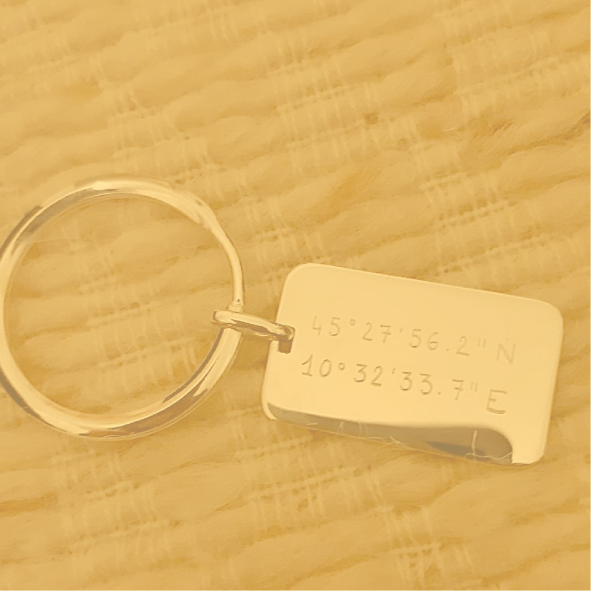

In [58]:
images[0]

In [52]:
def encode_images_to_base64(image_paths):
    encoded_images = []
    for file in image_paths:
        with open(file, "rb") as image:
            encoded = base64.b64encode(image.read()).decode()
            encoded_images.append(f"data:image/jpeg;base64,{encoded}")
    return encoded_images